# Initialization
*make sure you have MDAnalysis*
also, **DO NOT** run the entire notebook, it takes a while

In [1]:
import matplotlib.pyplot as plt
import scipy as sp
import MDAnalysis as mda
# import re
import json
# import readline
from termcolor import cprint
import os
# sys, getopt
# import warnings

In [2]:
!pwd

/Users/shea/dcuments/research/dph-rotation


In [3]:
filename = 'pbc_whole'
u = mda.Universe(filename+'.gro')

In [4]:
u.load_new('pbc_whole.xtc')
len(u.trajectory)

2211

In [5]:
dph_atoms = u.select_atoms("resid 9326 and not name H*")
len(dph_atoms)

18

In [6]:
dph_traj = sp.zeros((len(u.trajectory),len(dph_atoms),3))

In [10]:
# for i, ts in enumerate(u.trajectory):
#     for j, n in enumerate(dph_atoms):
#         dph_traj[i, j] = u.atoms(dph_atoms.position
# dph_traj = dph_atoms.positions
if os.path.exists('dph-traj.npy')==False:
    dph_traj = sp.zeros((len(u.trajectory),len(dph_atoms),3))
    for i, ts in enumerate(u.trajectory):
        dph_traj[i] = dph_atoms.positions
    sp.save('dph-traj',dph_traj)
else:
    dph_traj = sp.load('dph-traj.npy')

**dph_traj looks like:**

[timestep, atom_index, {012}={xyz}]

19


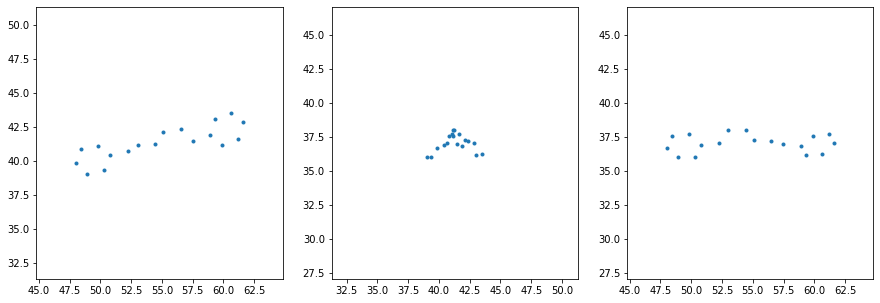

In [11]:
# for i in range(20):
i = 19
print(i)
tstep = i*100
center = sp.mean(dph_traj[tstep,:,:],axis=0)

plt.figure(figsize = (15,5))
plt.subplot(131)
plt.plot(dph_traj[tstep,:,0],dph_traj[tstep,:,1],'.')
plt.xlim(center[0]-10,center[0]+10)
plt.ylim(center[1]-10,center[1]+10)

plt.subplot(132)
plt.plot(dph_traj[tstep,:,1],dph_traj[tstep,:,2],'.')
plt.xlim(center[1]-10,center[1]+10)
plt.ylim(center[2]-10,center[2]+10)

plt.subplot(133)
plt.plot(dph_traj[tstep,:,0],dph_traj[tstep,:,2],'.')
plt.xlim(center[0]-10,center[0]+10)
plt.ylim(center[2]-10,center[2]+10)
plt.show()

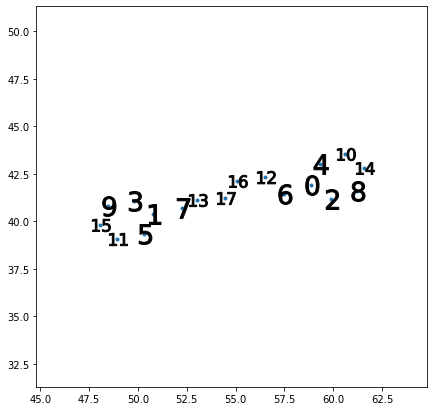

In [12]:
tstep = 1900
center = sp.mean(dph_traj[tstep,:,:],axis=0)


plt.figure(figsize = (7,7))
plt.plot(dph_traj[tstep,:,0],dph_traj[tstep,:,1],'.')
plt.xlim(center[0]-10,center[0]+10)
plt.ylim(center[1]-10,center[1]+10)

for i in range(18):
    plt.plot(dph_traj[tstep,i,0],dph_traj[tstep,i,1],marker="$"+str(i)+"$", markersize=20, c=[0,0,0])

In [13]:
end_ind = [[0,2,4,8,10,14],[1,3,5,9,11,15]]

In [53]:
# print(dph_traj[0:2,end_ind[0],:])
# print(sp.mean(dph_traj[:,end_ind[0],:],axis=1))
end_0_arr = sp.mean(dph_traj[:,end_ind[0],:],axis=1)

# print(sp.mean(dph_traj[:,end_ind[1],:],axis=1))
end_1_arr = sp.mean(dph_traj[:,end_ind[1],:],axis=1)
dph_vector = end_1_arr-end_0_arr
dph_vector = sp.array(dph_vector)

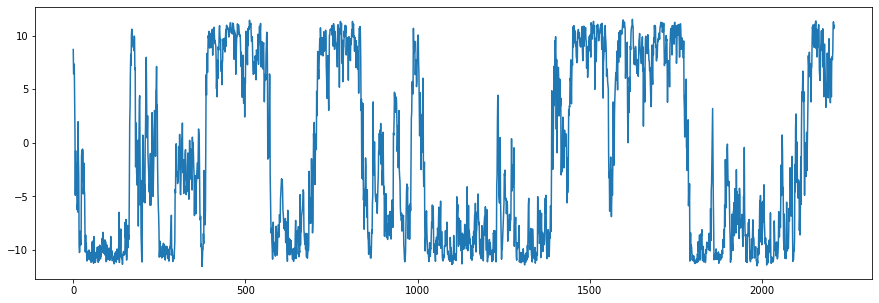

In [54]:
plt.figure(figsize=(15,5))
plt.plot(dph_vector[:,2])
plt.show()
# plt.plot(sp.sqrt(dph_vector[:,0]**2+dph_vector[:,1]**2+dph_vector[:,2]**2))

In [86]:
# Normalizing the vector now
dph_normed = sp.zeros_like(dph_vector)
for i,vec in enumerate(dph_vector):
    dph_normed[i] = vec/sp.linalg.norm(vec)

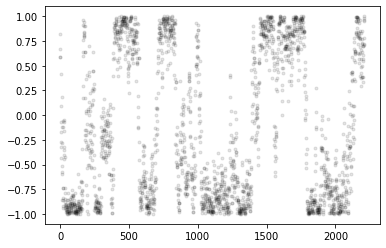

In [101]:
plt.plot(dph_normed[:,2],'k.',alpha=0.1)

In [19]:
print(sp.special.legendre(2))
print(sp.special.legendre(2)(-0.574))

     2
1.5 x - 0.5
-0.00578600000000018


In [107]:
print(sp.special.legendre(4))

       4             3        2
4.375 x + 4.857e-16 x - 3.75 x + 2.429e-16 x + 0.375


In [108]:
p2_arr = sp.array([sp.special.legendre(2)(costheta) for costheta in dph_normed[:,2]])
p4_arr = sp.array([sp.special.legendre(4)(costheta) for costheta in dph_normed[:,2]])

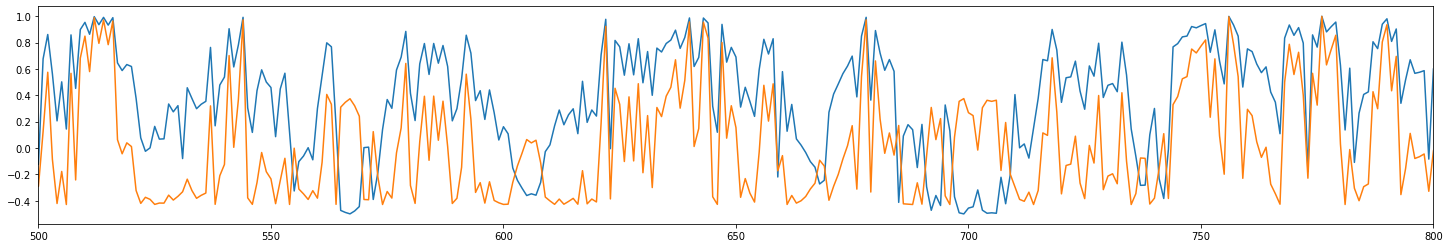

In [111]:
plt.figure(figsize = (25,4))
plt.plot(p2_arr,'-')
plt.plot(p4_arr,'-')
plt.xlim(500,800)
plt.show()

In [59]:
print(f'S_2 = {sp.mean(p2_arr)**2:5.4f}')
print(f'S_4 = {sp.mean(p4_arr)**2:5.4f}')

S_2 = 0.1045
S_4 = 0.0054


In [119]:
parray = [sp.mean(sp.array([sp.special.legendre(i)(costheta) for costheta in dph_normed[:,2]]))**2
          for i in range(1,12)]

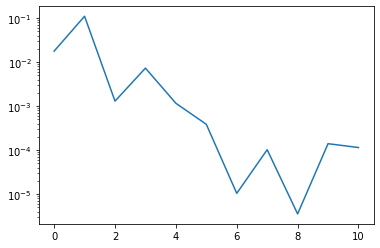

In [120]:
plt.plot(parray)
plt.yscale('log')